### Himanshu Kakwani


## Installing requires libraries

In [ ]:
!pip  install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 4.5 MB/s eta 0:00:00
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [ ]:
!pip install umap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3565 sha256=046f70c7e9d3a490556567fa20484fd78d70f88133ee64fd2c23862d0f960bc0
  Stored in directory: /root/.cache/pip/wheels/d4/13/91/2e752dc8dab5df027854bd33d2b65e1dc5cdc107fd1133990f
Successfully built umap


In [ ]:
!pip install umap-learn[plot]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 375.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 KB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=e447d9e70b70ac58ef59eba8c808771ff49e10e75428eeba6f3e6702b5b8c71b
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=bb2bd00ca5b190bf16703f418a6b9bdc111375c06ae1add50fbcc655fc69a1ab
  Stored in directory: /root/.ca

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import plotly.express as px
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import klib
import umap
from sklearn.metrics import mean_squared_error
import xgboost as xgb

## Import data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Fraud.csv"
df = pd.read_csv(path)
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## EDA and pre-processing

As we can see from the figure below, the data is very unbalanced, hence posses a challenge for proper analysis.

In [ ]:
colors = ['gold', 'mediumturquoise']
labels = ['Normal Transactions','Fraud Transactions']
values = df['isFraud'].value_counts()/df['isFraud'].shape[0]
fig = go.Figure(data=[go.Pie(labels = labels,
                             values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='white', width=0.1)))
fig.update_layout(
    title_text="Credit Card Fraud",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

Our data has no null values, hence missing value imputation is not required

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
df.describe().style.set_properties(**{'background-color': 'black',
                           'color': 'white',
                           'border-color': 'white'})

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000
mean,243.397246,179861.903549,833883.104074,855113.668579,1100701.666520,1224996.398202,0.001291,0.000003
std,142.331971,603858.231463,2888242.673038,2924048.502954,3399180.112994,3674128.942120,0.035905,0.001586
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,156.000000,13389.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,239.000000,74871.940000,14208.000000,0.000000,132705.665000,214661.440000,0.000000,0.000000
75%,335.000000,208721.477500,107315.175000,144258.410000,943036.707500,1111909.250000,0.000000,0.000000
max,743.000000,92445516.640000,59585040.370000,49585040.370000,356015889.350000,356179278.920000,1.000000,1.000000


Checking the skewness of data, if skewness is beyond the limit of -1 to 1, it means that data is highly skewed and we need to fix that before going forward with our analysis.


In [ ]:
#skewness
skew =df.skew().sort_values(ascending =False )
skew_df= pd.DataFrame({'skew':skew})
skew_df.head(10)

<ipython-input-12-b3937ade9d23>:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,skew
isFlaggedFraud,630.603629
amount,30.993949
isFraud,27.779538
oldbalanceDest,19.921758
newbalanceDest,19.352302
oldbalanceOrg,5.249136
newbalanceOrig,5.176884
step,0.375177


The following features are highly skewed:


In [ ]:
skew_df[(skew_df['skew']>=1) |(skew_df['skew']<=-1) ].index

Index(['isFlaggedFraud', 'amount', 'isFraud', 'oldbalanceDest',
       'newbalanceDest', 'oldbalanceOrg', 'newbalanceOrig'],
      dtype='object')

Correcting the skewness of our data

In [ ]:
amount_corrected= np.log(df['amount' ]+1)

print(df['amount'].skew())

print(amount_corrected.skew())

#from highly skewed to moderately skewed

30.99394948249038
-0.5550183204227738


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



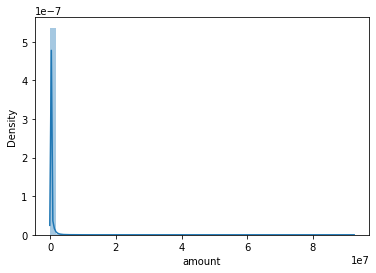

In [ ]:
ax = sns.distplot(df['amount'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'After correcting skewness')

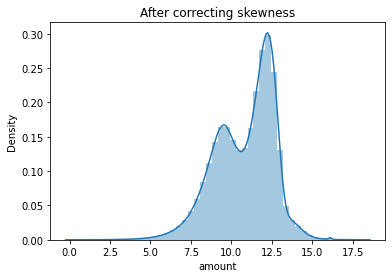

In [ ]:
ax1 = sns.distplot(amount_corrected)
plt.title('After correcting skewness')

Checking kurtosis of our data. Data with kurtosis greater than 3 means that the data is platykurtic and has very high distribution of outliers.

In [ ]:
kurtosis= pd.DataFrame(df.kurtosis(),columns=['Kurtosis'])
kurtosis.head(8)

<ipython-input-17-ee2badeafcfe>:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,Kurtosis
step,0.329071
amount,1797.956705
oldbalanceOrg,32.964879
newbalanceOrig,32.066985
oldbalanceDest,948.674125
newbalanceDest,862.156508
isFraud,769.702982
isFlaggedFraud,397659.062500


In [ ]:
kurtosis[(kurtosis['Kurtosis']>=3) |(kurtosis['Kurtosis']<=-3) ].index

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [ ]:
amount_corrected.kurtosis()

0.18355647921117813

Dealing with the problem of outliers

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

step              1.790000e+02
amount            1.953319e+05
oldbalanceOrg     1.073152e+05
newbalanceOrig    1.442584e+05
oldbalanceDest    9.430367e+05
newbalanceDest    1.111909e+06
isFraud           0.000000e+00
isFlaggedFraud    0.000000e+00
dtype: float64


In [ ]:
df_num=df.select_dtypes(exclude=['category']) 
df_out = df_num[~((df_num < (Q1 - 1.5 * IQR))|(df_num > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)
del df_num 
del df_out 

<ipython-input-21-7cda6bbcaee9>:2: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



(4319406, 11)


In [ ]:
df.describe().style.set_properties(**{'background-color': 'black',
                           'color': 'white',
                           'border-color': 'white'})

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000,6362620.000000
mean,243.397246,179861.903549,833883.104074,855113.668579,1100701.666520,1224996.398202,0.001291,0.000003
std,142.331971,603858.231463,2888242.673038,2924048.502954,3399180.112994,3674128.942120,0.035905,0.001586
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,156.000000,13389.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,239.000000,74871.940000,14208.000000,0.000000,132705.665000,214661.440000,0.000000,0.000000
75%,335.000000,208721.477500,107315.175000,144258.410000,943036.707500,1111909.250000,0.000000,0.000000
max,743.000000,92445516.640000,59585040.370000,49585040.370000,356015889.350000,356179278.920000,1.000000,1.000000


Checking correlation of different features with one another and the target variable

In [ ]:
import plotly.express as px
plt.figure(figsize=(20,20))
corr=df.corr().round(1)
fig = px.imshow(corr)
fig.update_layout(
    title_text="Credit Card Fraud",
    title_font_color="white",
    legend_title_font_color="yellow",
    paper_bgcolor="black",
    plot_bgcolor='black',
    font_color="white",
)
fig.show()

<Figure size 1440x1440 with 0 Axes>

The feature 'amount' is highly correlated with our target variable

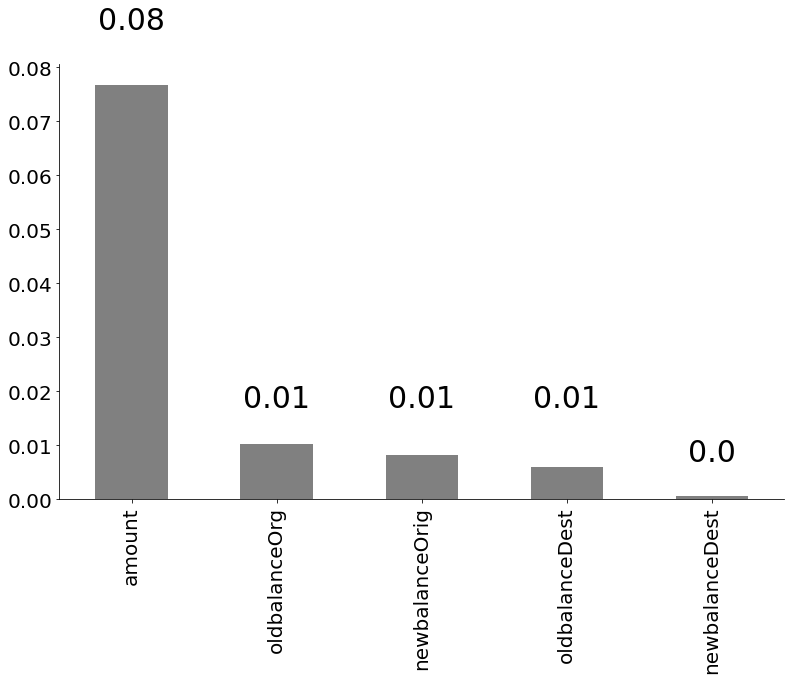

In [ ]:
features = [
    'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest'
]

plt.figure(figsize=(13,8))
ax = abs(df[features].corrwith(df.isFraud)).sort_values(ascending=False).plot(kind='bar',color='grey',fontsize=20)
for p in ax.patches:
    height = p.get_height().round(2)
    ax.text(p.get_x() + p.get_width() / 2., height+0.007, height, ha = 'center', size = 30)
sns.despine()

Plotting the distribution of various features along with their histograms

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


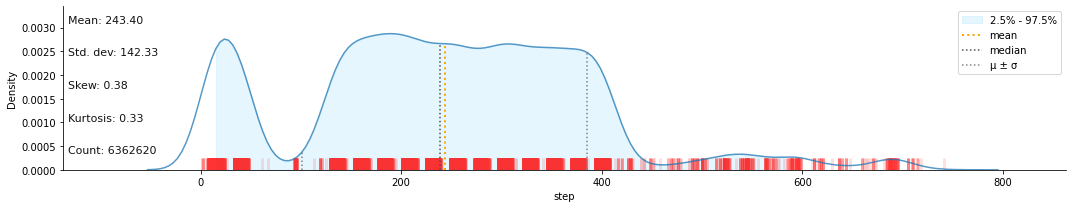

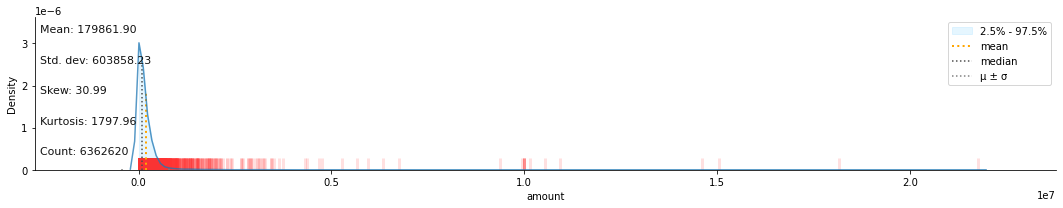

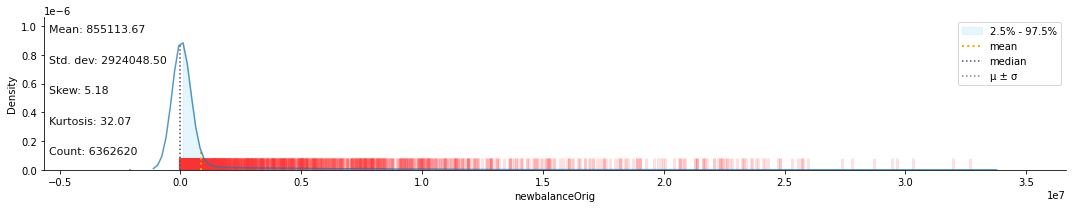

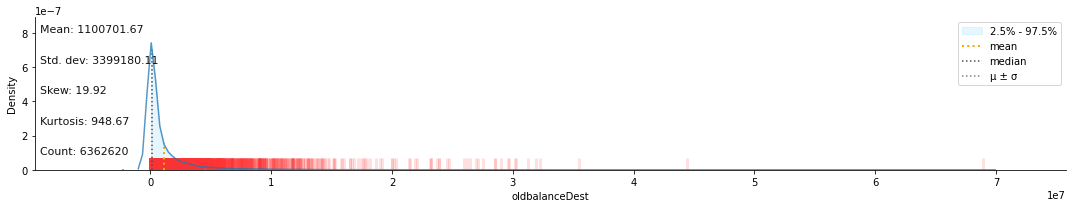

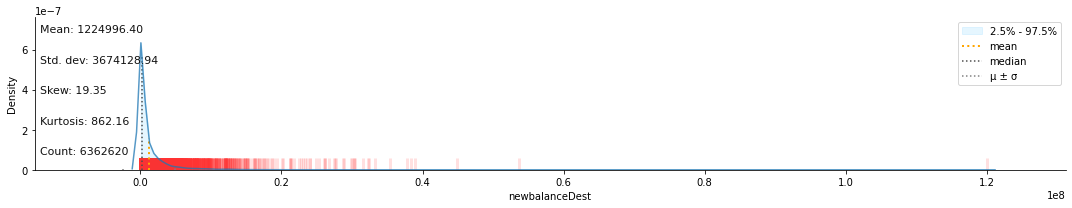

In [ ]:
klib.dist_plot(df[['step',  'amount', 'nameOrig', 
       'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest']])

Checking the count of the categorical feature 

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

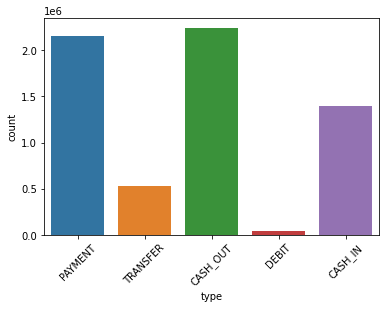

In [ ]:
g= sns.countplot(x='type', data=df)
plt.xticks(rotation=45)

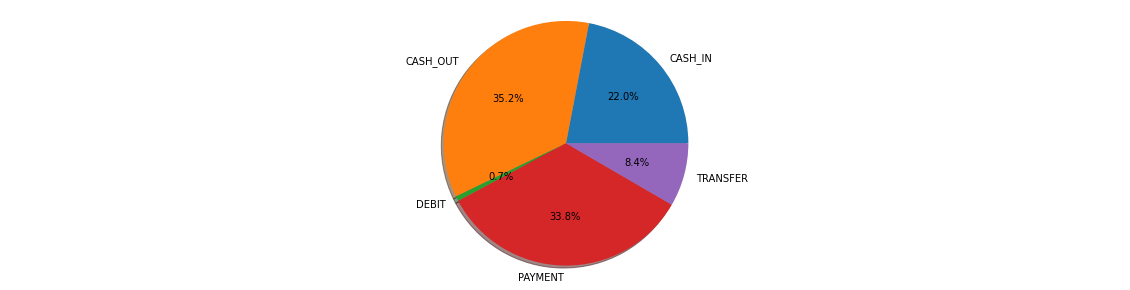

In [ ]:
labels = df['type'].astype('category').cat.categories.tolist()
counts = df['type'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots(figsize = (20,5))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

One-hot encoding the 'type' column for better parsing by our model


In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
# enc_data=pd.DataFrame(enc.fit_transform(df['type']).toarray())
enc_data =  pd.get_dummies(df, columns = ['type'])
enc_data

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0,1,0,0,0
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0,0,0,0,1
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,0,1,0,0,0
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0,0,0,0,1


Dropping columns that are not relevant


In [ ]:
df = enc_data.drop(['nameOrig', 'nameDest' ], axis = 1)

Splitting data 

In [ ]:
target= "isFraud"
X = df.drop(target, axis='columns')# axis=1
y = df[target].to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0,stratify=y )
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

1908786 rows in test set vs. 4453834 in training set. 12 Features.


In [ ]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [ ]:
cat_columns = X.select_dtypes(exclude=['int64','int16','float32','float64','int8']).columns
num_columns = X.select_dtypes(include=['int64','int16','float32','float64','int8']).columns

ValueError: ignored

<Figure size 432x288 with 0 Axes>

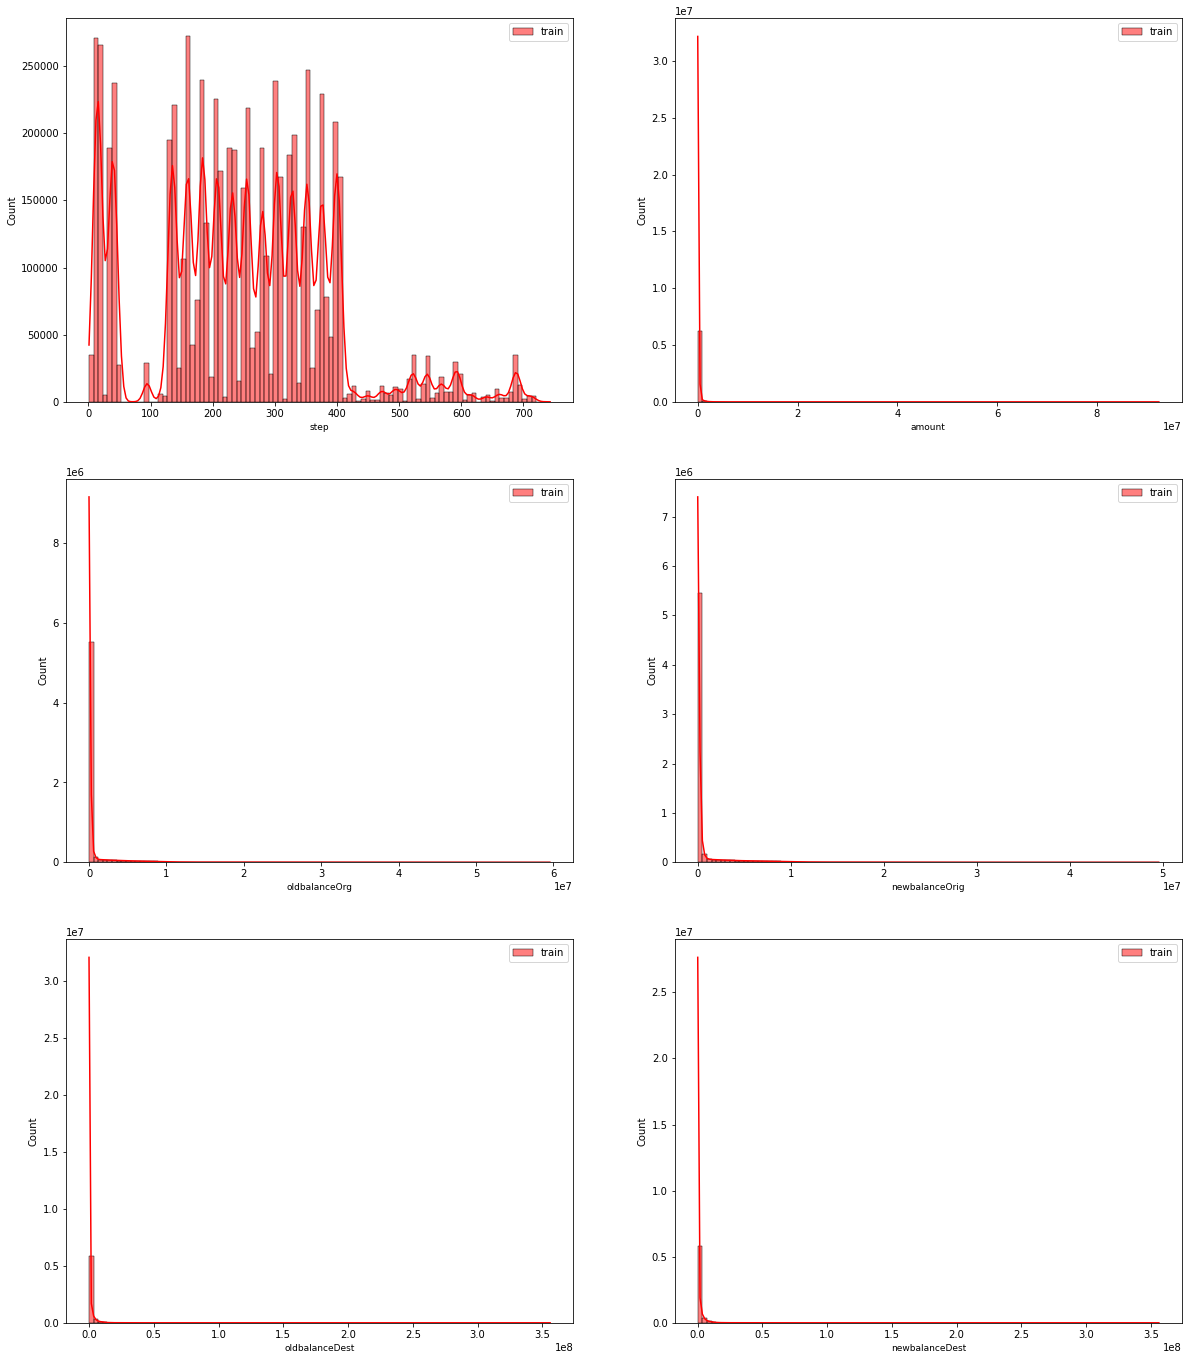

In [ ]:
i = 1
plt.figure()
fig, ax = plt.subplots(3, 2,figsize=(20, 24))
for feature in num_columns:
    plt.subplot(3, 2,i)
    sns.histplot(df[feature],color="red", kde=True,bins=100, label='train')
    plt.xlabel(feature, fontsize=9); plt.legend()
    i += 1
plt.show()


Visualising correlation of different features with our target variable, this helps us in feature selection.

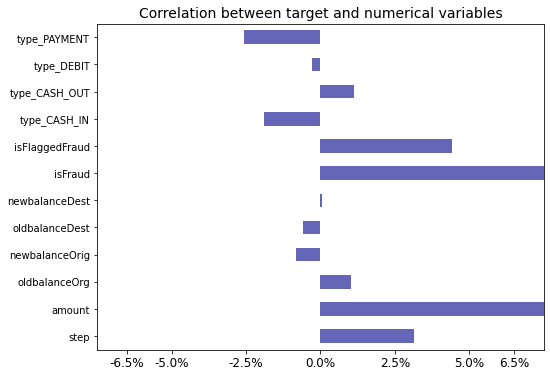

In [ ]:
df.corr()['isFraud'][:-1].plot.barh(figsize=(8,6),alpha=.6,color='darkblue')
plt.xlim(-.075,.075);
plt.xticks([-0.065, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,  0.065],
           [str(100*i)+'%' for i in [-0.065, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,  0.065]],fontsize=12)
plt.title('Correlation between target and numerical variables',fontsize=14);

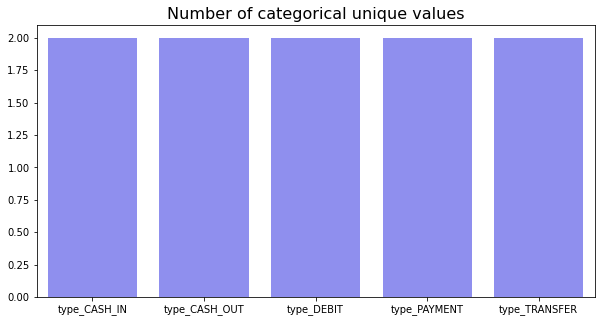

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.barplot(y=df[cat_columns].nunique().values, x=df[cat_columns].nunique().index, color='blue', alpha=.5)
plt.xticks(rotation=0)
plt.title('Number of categorical unique values',fontsize=16);

Plotting violin-plots to visualize the distribution as well as get a better idea about the outliers in relation with our target variable


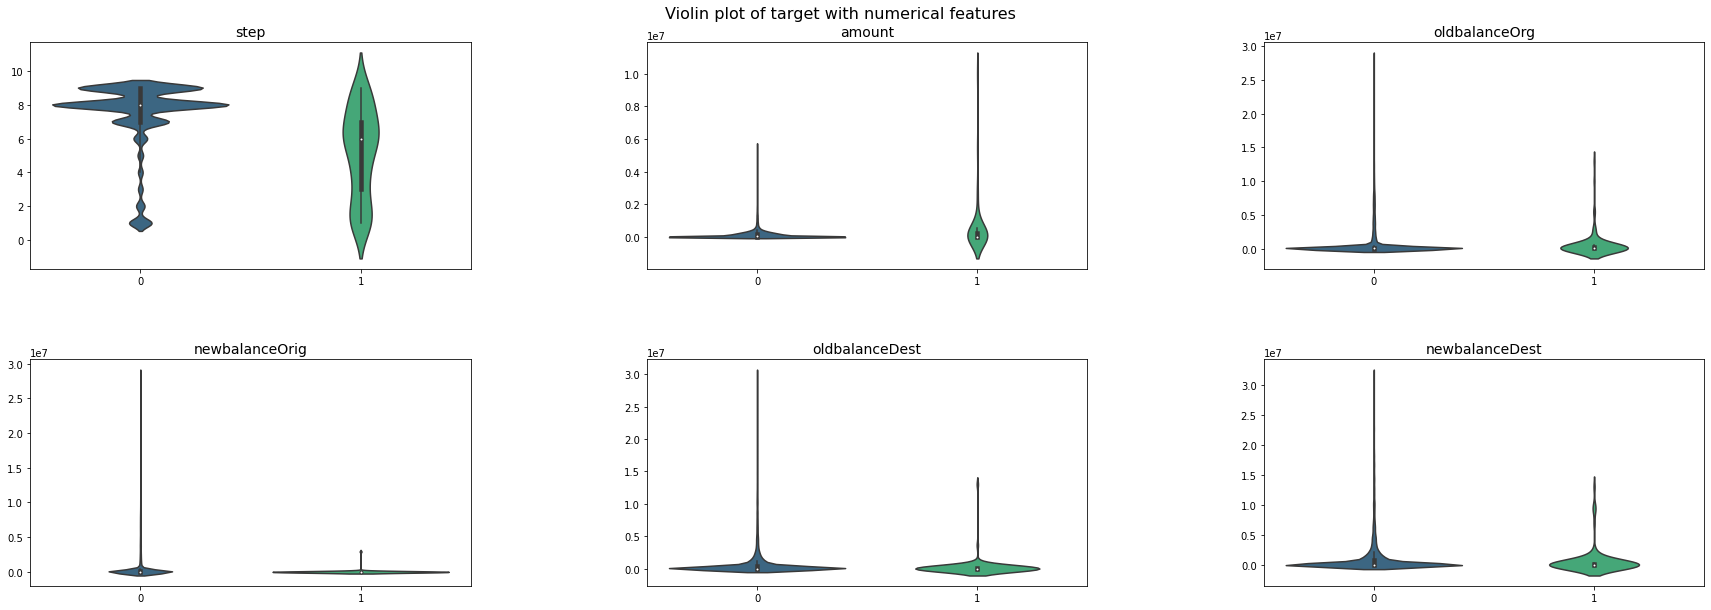

In [ ]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(30,10))
grid =  gridspec.GridSpec(2,3,figure=fig,hspace=.4,wspace=.4)
n =0
for i in range(2):
    for j in range(3):
        ax = fig.add_subplot(grid[i, j])
        sns.violinplot(data =  df.iloc[0:50000], y = num_columns[n] , x ='isFraud' ,ax=ax, alpha =.7, fill=True,palette='viridis')
        ax.set_title(num_columns[n],fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('')
        n += 1
        
fig.suptitle('Violin plot of target with numerical features', fontsize=16,y=.93);

Transforming data to a higher dimension for better visualisation and classification.

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import PowerTransformer, StandardScaler,Normalizer,RobustScaler,MaxAbsScaler,MinMaxScaler,QuantileTransformer
m = TSNE()
df_numeric =df.iloc[0:50000]._get_numeric_data()
df_numeric=df_numeric.dropna()
Xtrain =RobustScaler().fit_transform(df_numeric)
del df_numeric 
# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(Xtrain)
print(tsne_features.shape)


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



(50000, 2)


Sample from population visualized in a higher dimension.


<ipython-input-39-b25fa193b143>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-39-b25fa193b143>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<function matplotlib.pyplot.show(*args, **kw)>

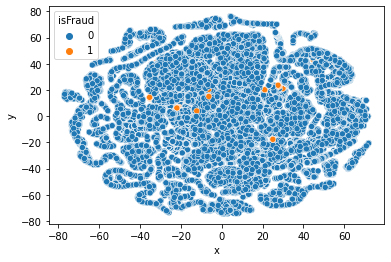

In [ ]:
trainessai=df.iloc[0:50000]
trainessai['x']=tsne_features[:, 0]
trainessai['y']=tsne_features[:, 1]
# Color the points according to Army Component
sns.scatterplot(x='x', y='y', hue='isFraud', data=trainessai)
# Show the plot
plt.show


In [ ]:
df_num =df._get_numeric_data()
df_num=df_num.dropna()

In [ ]:
target= "isFraud"
X1 = df_num.drop(target, axis='columns')

Applying SMOTE to convert imbalanced data to balanced

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X1, y)
print('Feature/label dataset for training before applying SMOTE: ', X1.shape, y.shape)
print('Feature/label dataset for training after applying SMOTE: ', X_train_smote.shape, y_train_smote.shape)
print('Distribution of label values after applying SMOTE:\n',pd.Series(y_train_smote).value_counts())
# X_train_smote = X_train_smote.value_counts()
# y_train_smote = y_train_smote.value_counts()


Feature/label dataset for training before applying SMOTE:  (6362620, 12) (6362620,)
Feature/label dataset for training after applying SMOTE:  (12708814, 12) (12708814,)
Distribution of label values after applying SMOTE:
 0    6354407
1    6354407
dtype: int64


In [ ]:
# df_smote = pd.concat([X_train_smote,y_train_smote],axis=1)
# fig = px.histogram(df_smote, x="amount", 
#                    color="Class", 
#                    marginal="box",
#                    barmode ="overlay",
#                    histnorm ='density'
#                   )  
# fig.update_layout(
#     title_text="Oversampled by SMOTE",
#     title_font_color="white",
#     legend_title_font_color="yellow",
#     paper_bgcolor="black",
#     plot_bgcolor='black',
#     font_color="white",
# )
# fig.show()

Using XG Boost to fit a model, metric being loss.

In [ ]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=100,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[18:03:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:03:28] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[0]	validation_0-rmse:0.495014	validation_1-rmse:0.495014
[99]	validation_0-rmse:0.184738	validation_1-rmse:0.184736


XGBRegressor(early_stopping_rounds=50, learning_rate=0.01)

As illustrated above, we can see that over the epochs, the model has learned well and has minimised its loss and standardized the loss for target variable.